In [161]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading Data 

In [162]:
df=pd.read_csv('uber-raw-data-apr14.csv')
df.head(10)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


In [163]:
df.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [164]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [ ]:
# checking pd date time functionality

In [165]:
dt='4/1/2014 0:11:00'
pandas_dt=pd.to_datetime(dt)
pandas_dt

Timestamp('2014-04-01 00:11:00')

In [166]:
pandas_dt.day, pandas_dt.month,pandas_dt.weekday(),pandas_dt.day_name(),pandas_dt.hour


(1, 4, 1, 'Tuesday', 0)

#### mapping the pd.to_datetime function over the datetime column in our dataframe

In [167]:
df['Date/Time']=df["Date/Time"].map(pd.to_datetime)

In [168]:
df['Date/Time']


0        2014-04-01 00:11:00
1        2014-04-01 00:17:00
2        2014-04-01 00:21:00
3        2014-04-01 00:28:00
4        2014-04-01 00:33:00
                 ...        
564511   2014-04-30 23:22:00
564512   2014-04-30 23:26:00
564513   2014-04-30 23:31:00
564514   2014-04-30 23:32:00
564515   2014-04-30 23:48:00
Name: Date/Time, Length: 564516, dtype: datetime64[ns]

In [169]:
def get_day(dt):
    #print(dt)
    return dt.day
def get_weekday(dt):
    return dt.day_name()
def get_hour(dt):
    return dt.hour

In [63]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [171]:

df['weekday']=df['Date/Time'].map(get_weekday)
df['day']=df['Date/Time'].map(get_day)
df

,Date/Time,Lat,Lon,Base,weekday,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1
...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30


In [172]:
df['hour']=df['Date/Time'].map(get_hour)
df

,Date/Time,Lat,Lon,Base,weekday,day,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30,23


## analyze by Days of Month

Text(0.5, 1.0, 'Frequency By Date Of Month April-2014 ')

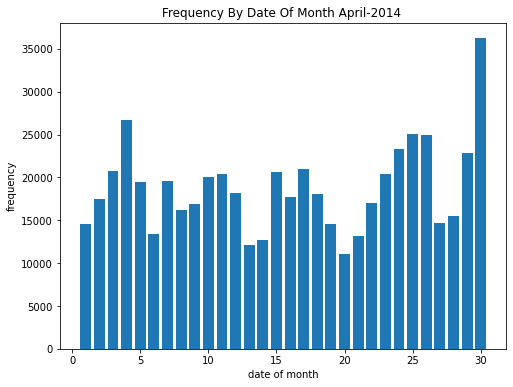

In [173]:
plt.figure(figsize=(8, 6))
hist(df.day, rwidth=0.8,range=(0.5,30.5), bins=30)
plt.xlabel('date of month')
plt.ylabel('frequency')
plt.title('Frequency By Date Of Month April-2014 ')

In [208]:
def count_rows(rows):
    return len(rows)

In [174]:

by_date=df.groupby('day').apply(count_rows)
by_date

day
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

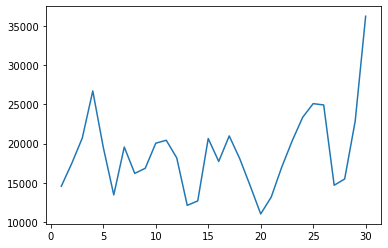

In [175]:
plt.plot(by_date)

In [176]:

df2 = pd.DataFrame(by_date)
df2

,0
day,
1,14546
2,17474
3,20701
4,26714
5,19521
6,13445
7,19550
8,16188
9,16843


In [177]:
columns_name=['frequency']
df2.columns=columns_name
df2

,frequency
day,
1,14546
2,17474
3,20701
4,26714
5,19521
6,13445
7,19550
8,16188
9,16843


<AxesSubplot:xlabel='day'>

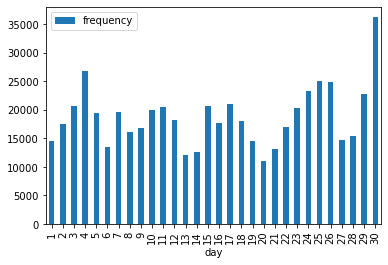

In [178]:
df2.plot.bar()

## analyze by Hours of Day

Text(0.5, 1.0, 'Frequency By Hours of Day April-2014 ')

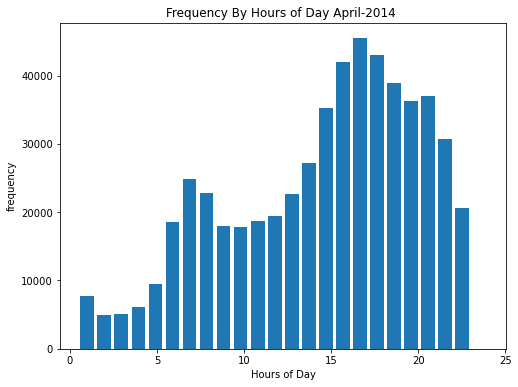

In [187]:
plt.figure(figsize=(8, 6))
hist(df.hour, rwidth=0.8,range=(0.5,24), bins=24)
plt.xlabel('Hours of Day')
plt.ylabel('frequency')
plt.title('Frequency By Hours of Day April-2014 ')

In [188]:
by_hour=df.groupby('hour').apply(count_rows)
by_hour

hour
0     11910
1      7769
2      4935
3      5040
4      6095
5      9476
6     18498
7     24924
8     22843
9     17939
10    17865
11    18774
12    19425
13    22603
14    27190
15    35324
16    42003
17    45475
18    43003
19    38923
20    36244
21    36964
22    30645
23    20649
dtype: int64

In [190]:
by_hour_sorted=by_hour.sort_values()
by_hour_sorted

hour
2      4935
3      5040
4      6095
1      7769
5      9476
0     11910
10    17865
9     17939
6     18498
11    18774
12    19425
23    20649
13    22603
8     22843
7     24924
14    27190
22    30645
15    35324
20    36244
21    36964
19    38923
16    42003
18    43003
17    45475
dtype: int64

<AxesSubplot:xlabel='hour'>

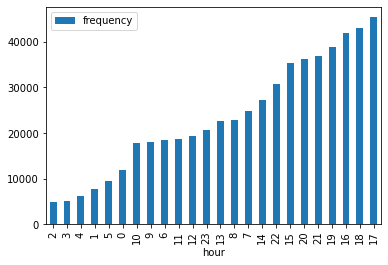

In [201]:
df_hour = pd.DataFrame(by_hour_sorted)
columns_name=['frequency']
df_hour.columns=columns_name
df_hour.plot.bar()

##### this shows that frequency is highest during 14-22 hours

## analyze by WeekDays 

Text(0.5, 1.0, 'Frequency By  WeekDays of Month April-2014 ')

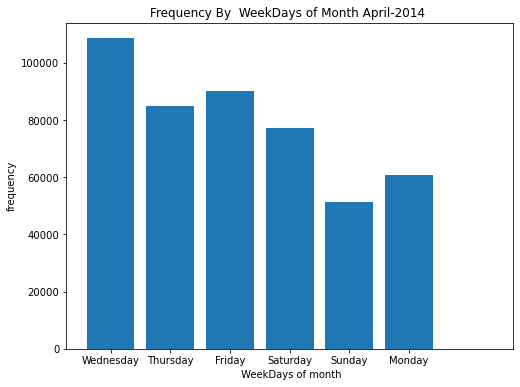

In [185]:
plt.figure(figsize=(8, 6))
hist(df.weekday, rwidth=0.8,range=(0.5,7.5), bins=7)
plt.xlabel(' WeekDays of month')
plt.ylabel('frequency')
plt.title('Frequency By  WeekDays of Month April-2014 ')

In [186]:

by_weekday=df.groupby('weekday').apply(count_rows)
by_weekday

weekday
Friday        90303
Monday        60861
Saturday      77218
Sunday        51251
Thursday      85067
Tuesday       91185
Wednesday    108631
dtype: int64

In [192]:
by_weekday_sorted=by_weekday.sort_values()
by_weekday_sorted

weekday
Sunday        51251
Monday        60861
Saturday      77218
Thursday      85067
Friday        90303
Tuesday       91185
Wednesday    108631
dtype: int64

<AxesSubplot:xlabel='weekday'>

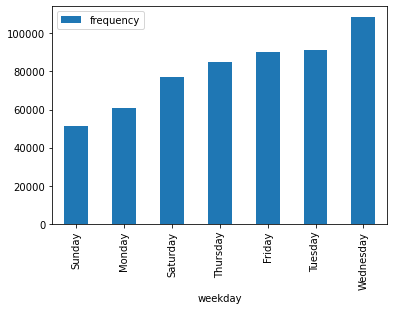

In [200]:
df3 = pd.DataFrame(by_weekday_sorted)
columns_name=['frequency']
df3.columns=columns_name
df3.plot.bar()

#### this shows that  frequency is heighest on wednesday

## Analysis by weekdays and hour

In [210]:
week_hour_df=df.groupby('weekday hour'.split()).apply(count_rows).unstack()
week_hour_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
Monday,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
Saturday,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
Sunday,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018
Thursday,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
Tuesday,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
Wednesday,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571


<AxesSubplot:xlabel='hour', ylabel='weekday'>

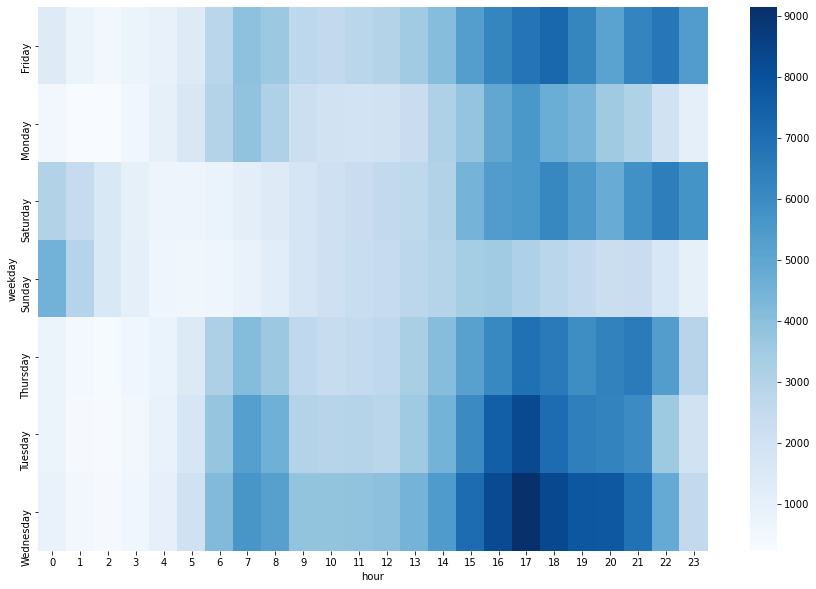

In [213]:
plt.figure(figsize=(15, 10))
sns.heatmap(week_hour_df,cmap="Blues")

##### as above graph already indicated frequency is higher during wednesdays and from 14-22 
##### heatmap more clearly show that that frequency is high during wednesday and 14-22 hour as this region is more bluish(which indicate higher frequency)
